<a href="https://colab.research.google.com/github/Faycal214/Heart-attack-repo/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***import libraries***


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score

### ***show data***

In [2]:
heart= pd.read_csv("/content/drive/MyDrive/DataFrames/heart.csv")

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### ***explore data***

In [4]:
heart.shape

(303, 14)

In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
heart.duplicated().sum()

1

In [12]:
heart.drop_duplicates(inplace= True)

In [13]:
heart.shape

(302, 14)

here we removed the duplicated ligne

In [14]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### ***data visualization***

In [15]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

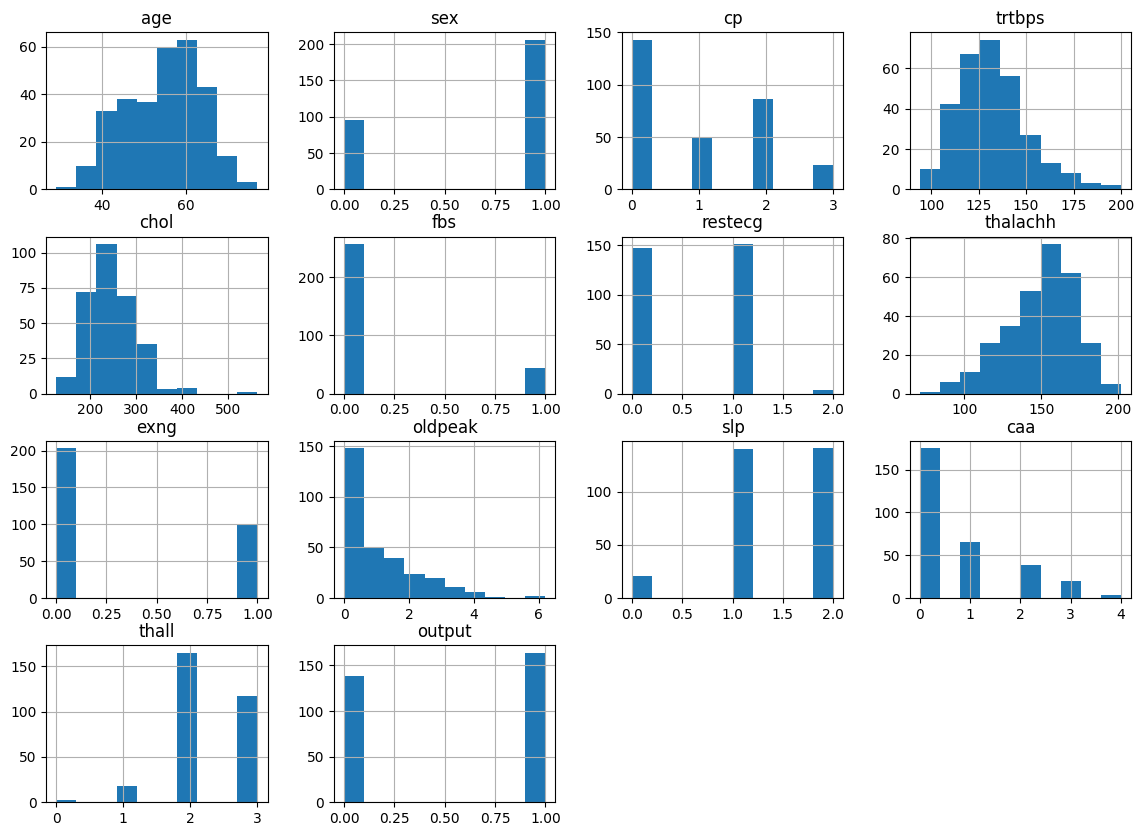

In [18]:
heart.hist(figsize= (14, 10))
plt.show()

In [19]:
heart["output"].value_counts()

1    164
0    138
Name: output, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

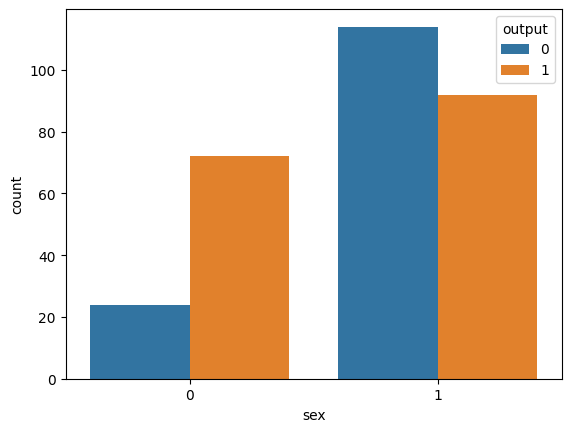

In [22]:
sns.countplot(data= heart, x= "sex", hue= "output")

<Axes: >

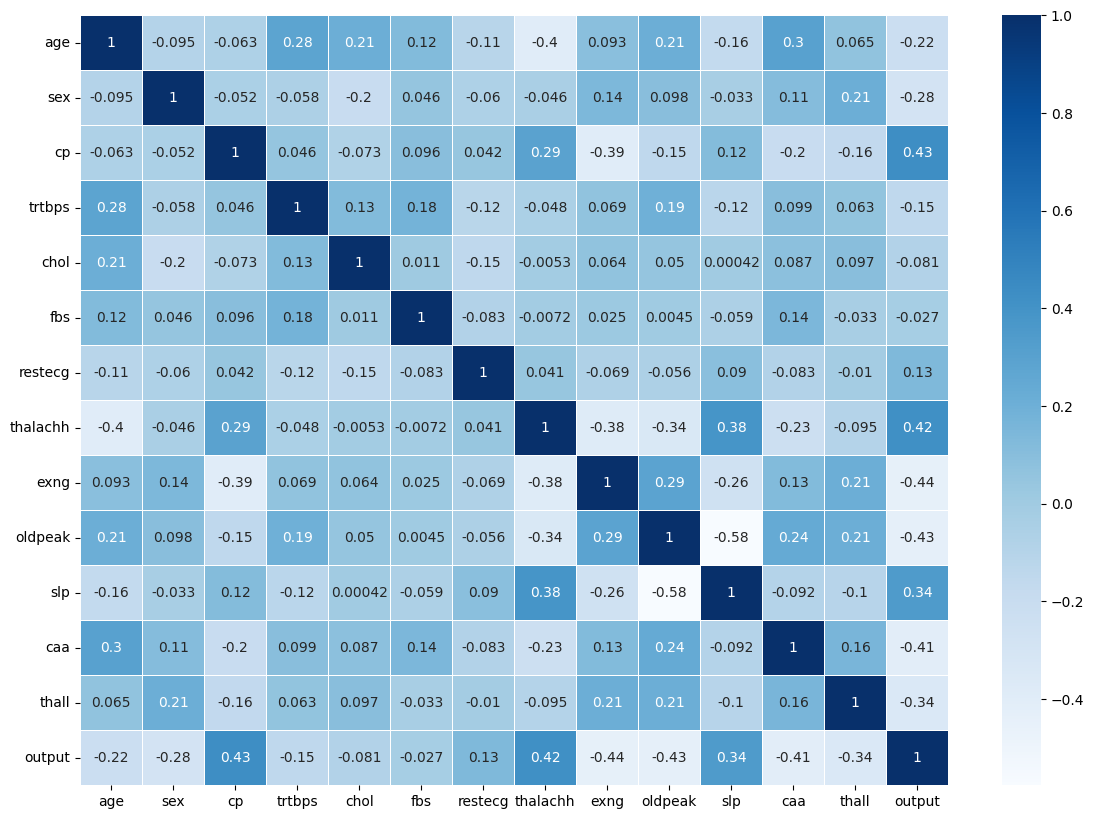

In [24]:
plt.figure(figsize= (14, 10))
sns.heatmap(heart.corr(), linewidths= 0.5, annot= True, cmap= "Blues")

### ***split data***

In [33]:
cols= []
for col in heart.columns :
  if col != "output" :
    cols.append(col)

In [34]:
print(cols)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


In [35]:
x= heart[cols]
y= heart["output"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)

In [39]:
print(x_train.shape, y_train.shape)

(211, 13) (211,)


In [40]:
print(x_test.shape, y_test.shape)

(91, 13) (91,)


### ***data preprocessing***

In [58]:
scaler= StandardScaler()

In [59]:
scaler.fit(x_train)

StandardScaler()

In [60]:
x_train= scaler.transform(x_train)

In [61]:
x_test= scaler.transform(x_test)

### ***data evaluation***

we'll work on the following models :

1.   DecissionTreeClassifier
2.   SVM
3.   KNN



In [62]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    model.fit(x_train, y_train)
    prediction= model.predict(x_test)

    accuracy= accuracy_score(y_test, prediction)
    f1= f1_score(y_test, prediction)
    precision= precision_score(y_test, prediction)
    recall= recall_score(y_test, prediction)
    balanced_accuracy = balanced_accuracy_score(y_test, prediction)

    evaluation_tab= pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return evaluation_tab

#### DecissionTreeClassifier



In [63]:
dtc= DecisionTreeClassifier()

In [84]:
dtc_results= evaluate_model(dtc, x_train, x_test, y_train, y_test)

In [85]:
dtc_results.index= ["DecisionTreeClassifier"]

In [86]:
dtc_results

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTreeClassifier,0.824176,0.833333,0.851064,0.816327,0.82483


#### SVM

In [67]:
svm= SVC()

In [68]:
svm_results= evaluate_model(svm, x_train, x_test, y_train, y_test)

In [70]:
svm_results.index= ["SVM"]

In [72]:
svm_results

,accuracy,f1_score,precision,recall,balanced_accuracy
SVM,0.813187,0.824742,0.833333,0.816327,0.812925


#### K-nearest-neighbors

In [73]:
knn= KNeighborsClassifier()

In [78]:
knn_results= evaluate_model(knn, x_train, x_test, y_train, y_test)

In [79]:
knn_results.index= ["KNN"]

In [80]:
knn_results

,accuracy,f1_score,precision,recall,balanced_accuracy
KNN,0.857143,0.868687,0.86,0.877551,0.855442


In [87]:
results= pd.concat([dtc_results, svm_results, knn_results])

In [88]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTreeClassifier,0.824176,0.833333,0.851064,0.816327,0.824830
SVM,0.813187,0.824742,0.833333,0.816327,0.812925
KNN,0.857143,0.868687,0.860000,0.877551,0.855442


### Conclusion

the best models in terms of :

1.   accuracy : K-neighbors model
2.   f1_score : K-neighbors model
3.   presicion : K-neighbors model
4.   recall : K-neighbors model
5.   balanced_accuracy : K-neighbors model

